In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
boston=load_boston()

In [3]:
x=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.Series(boston.target)

In [4]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
gradientregressor=GradientBoostingRegressor(max_depth=2.0,n_estimators=3,learning_rate=1.0)

In [8]:
#important parameters
#n_estimators:number of weak learners to train iteratively
#learning_rate:it contributes to the weigths of weak learners.it uses 1 as a default value

In [9]:
model=gradientregressor.fit(x_train,y_train)


In [10]:
y_pred=model.predict(x_test)

In [11]:
r2_score(y_pred,y_test)

0.49077191194100167

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importance=model.feature_importances_

In [13]:
feature_importance

array([0.01735046, 0.        , 0.        , 0.        , 0.        ,
       0.65683216, 0.        , 0.02961539, 0.03908505, 0.        ,
       0.        , 0.        , 0.25711695])

In [21]:
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5

In [19]:
feature_importance

array([  2.64153624,   0.        ,   0.        ,   0.        ,
         0.        , 100.        ,   0.        ,   4.50882091,
         5.95053776,   0.        ,   0.        ,   0.        ,
        39.14500109])

In [23]:
np.argsort(feature_importance)

array([ 1,  2,  3,  4,  6,  9, 10, 11,  0,  7,  8, 12,  5], dtype=int64)

In [35]:
np.arange(sorted_idx.shape[0])+0.5

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5])

In [22]:
feature_importance[sorted_idx]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   5.14292754,   6.85985521,  39.90785867,
       100.        ])

In [21]:
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5])

In [23]:
feature_importance[sorted_idx]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   3.73023913,   4.99328784,  29.70338034,
       100.        ])

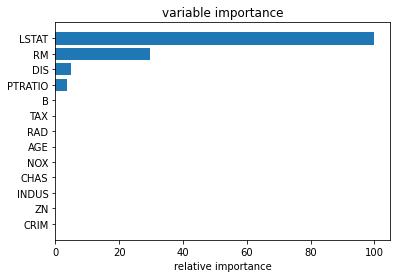

In [26]:
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,boston.feature_names[sorted_idx])
plt.xlabel("relative importance")
plt.title("variable importance")
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.15,0.1,1.0,10,0.05],'n_estimators':[100,150,200,250]}
tuning=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring='r2')
tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 250}, 0.8991651147763784)

In [32]:
#similarly other hyperparameters like max_depth,split_criteria,min no, of leaf nodes etc can be tuned

In [ ]:
#Pros:
#it iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners..
#gives better accuracy in most of the cases.

#Cons:
#Space and Time complexity 